In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir('C:/Users/tm/Downloads/utas/thesis/chapter1/channel')

In [2]:
#global vars
gridlen=40
radius=12

In [3]:
#read data
df=pd.read_csv('mask.csv',header=None)

In [4]:
#prepare
arr=np.array(df).flatten()

In [5]:
#convert lattice to adjacency list
check_matrix=arr.reshape(gridlen,gridlen)
adj_list={}

for i in range(gridlen**2):
    current_tile=[i//gridlen,i%gridlen]
    
    if check_matrix[current_tile[0],current_tile[1]]!=255:
        adj_list[i]=[]
        
        up=[current_tile[0]-1,current_tile[1]]
        down=[current_tile[0]+1,current_tile[1]]
        left=[current_tile[0],current_tile[1]-1]
        right=[current_tile[0],current_tile[1]+1]

        
        if up[0]>=0 and check_matrix[current_tile[0]-1,current_tile[1]]!=255:
            adj_list[i].append(i-gridlen)

        if down[0]<gridlen and check_matrix[current_tile[0]+1,current_tile[1]]!=255:
            adj_list[i].append(i+gridlen)
        
        if left[1]>=0 and check_matrix[current_tile[0],current_tile[1]-1]!=255:
            adj_list[i].append(i-1)

        if right[1]<gridlen and check_matrix[current_tile[0],current_tile[1]+1]!=255:
            adj_list[i].append(i+1)
            

In [6]:
#use bfs to identify the grids required for validation within the radius
counter=0
stop=False
lvl={}
lvl[0]=np.where(np.isnan(arr))[0].tolist()
radius=12
while not stop:
    
    queue=[]
    counter+=1
    if counter==radius:
        stop=True
    for i in list(lvl.values())[-1]:
        queue+=adj_list[i]
    lvl[counter]=list(set(queue))

validation_target=sorted(list(set([j for i in lvl.values() for j in i])))

In [7]:
#result
dispersal_cells=[i for i in validation_target if arr[i]==0]

In [8]:
distance_matrix=[]
for i in dispersal_cells:    
    mindist=999
    for j in np.where(np.isnan(arr))[0]:
        p1=(i//gridlen,i%gridlen)
        p2=(j//gridlen,j%gridlen)
        
        dist=((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**0.5
        if mindist>dist:
            mindist=dist
    distance_matrix.append(mindist)

In [9]:
#create dataframe for outflow area
selected=pd.DataFrame(dispersal_cells,columns=['ID'])
selected['selected']=dispersal_cells
selected['distance']=distance_matrix
selected.to_csv('./poems/selected.csv',index=False)

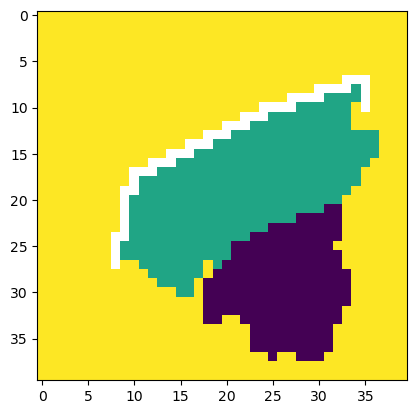

In [10]:
#viz
viz=np.array(df)

for i in dispersal_cells:
    viz[i//gridlen,i%gridlen]=150

plt.imshow(viz)